## Assignment 4: Logistic Regression {-}

This assignment aims at familiarizing you with the use of Logistic Regression model supported by scikit-learn. You will have to:

- Analyze the data.
- Process the data.
- Split train/test sets.
- Train a Logistic Regression model using the training set, then make prediction on the test set.
- Evaluate the model performance on the test set using the following metrics: precision, recall, f1 score, and print out the confusion matrix.

The dataset you will be working on is 'heart-disease.csv'. It is composed of 14 attributes which are age, sex, chest pain type, resting blood pressure, serum cholesterol, fasting blood sugar, etc. This dataset is to predict, based on the given attributes of a patient, whether that particular person has a heart disease or not.

### Submission {-}
The structure of submission folder should be organized as follows:

- ./\<StudentID>-assignment4-notebook.ipynb: Jupyter notebook containing source code.

The submission folder is named DataViz-Summer22-\<StudentID>-Assignment4 (e.g., DataViz- Summer22-2012345-Assigment4) and then compressed with the same name.
    
### Evaluation {-}
Assignment evaluation will be conducted on how properly you split the data for training and testing purpose, then build a classification model and evaluate its performance.

Note that the evaluation will not consider the model accuracy as the highest priority, but how properly you handle the data and use scikit-learn to build the classifier.

### Deadline {-}
Please visit Canvas for details.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('heart-disease.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
1,71,0,1,160,302,0,1,162,0,0.4,2,2,2,1
2,71,0,1,160,303,0,1,163,0,0.4,2,2,2,1
3,71,0,1,160,304,0,1,164,0,0.4,2,2,2,1
4,71,0,1,160,305,0,1,165,0,0.4,2,2,2,1


### Data features: {-}

* age: The person’s age in years
* sex: The person’s sex (1 = male, 0 = female)
* cp: chest pain type
  * Value 0: asymptomatic
  * Value 1: atypical angina
  * Value 2: non-anginal pain
  * Value 3: typical angina
* trestbps: The person’s resting blood pressure (mm Hg on admission to the hospital)
* chol: The person’s cholesterol measurement in mg/dl (mg/dl: milligrams per decilitre)
* fbs: The person’s fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false) (Fasting blood glucose: A test to determine how much glucose (sugar) is in a blood sample after an overnight without eating).
* restecg: resting electrocardiographic results
  * Value 0: showing probable or definite left ventricular hypertrophy by Estes’ criteria
  * Value 1: normal
  * Value 2: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
* thalach: The person’s maximum heart rate achieved
* exang: Exercise induced angina (1 = yes; 0 = no)
* oldpeak: ST depression induced by exercise relative to rest (‘ST’ relates to positions on the ECG plot)
* slope: the slope of the peak exercise ST segment
  * 0: downsloping
  * 1: flat
  * 2: upsloping
* ca: The number of major vessels (values in 0–3)
* thal: A blood disorder called thalassemia
  * Value 0: NULL (dropped from the dataset previously
  * Value 1: fixed defect (no blood flow in some part of the heart)
  * Value 2: normal blood flow
  * Value 3: reversible defect (a blood flow is observed but it is not normal)
  
### Data label: {-}

* target: Heart disease (1 = no, 0= yes)

In [4]:
df.info()
#No Nan values, bravo!


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886 entries, 0 to 885
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       886 non-null    int64  
 1   sex       886 non-null    int64  
 2   cp        886 non-null    int64  
 3   trestbps  886 non-null    int64  
 4   chol      886 non-null    int64  
 5   fbs       886 non-null    int64  
 6   restecg   886 non-null    int64  
 7   thalach   886 non-null    int64  
 8   exang     886 non-null    int64  
 9   oldpeak   886 non-null    float64
 10  slope     886 non-null    int64  
 11  ca        886 non-null    int64  
 12  thal      886 non-null    int64  
 13  target    886 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 97.0 KB


In [21]:
df.duplicated().sum()
#No duplicates, bravo!

0

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'cp'}>,
        <AxesSubplot:title={'center':'trestbps'}>],
       [<AxesSubplot:title={'center':'chol'}>,
        <AxesSubplot:title={'center':'fbs'}>,
        <AxesSubplot:title={'center':'restecg'}>,
        <AxesSubplot:title={'center':'thalach'}>],
       [<AxesSubplot:title={'center':'exang'}>,
        <AxesSubplot:title={'center':'oldpeak'}>,
        <AxesSubplot:title={'center':'slope'}>,
        <AxesSubplot:title={'center':'ca'}>],
       [<AxesSubplot:title={'center':'thal'}>,
        <AxesSubplot:title={'center':'target'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

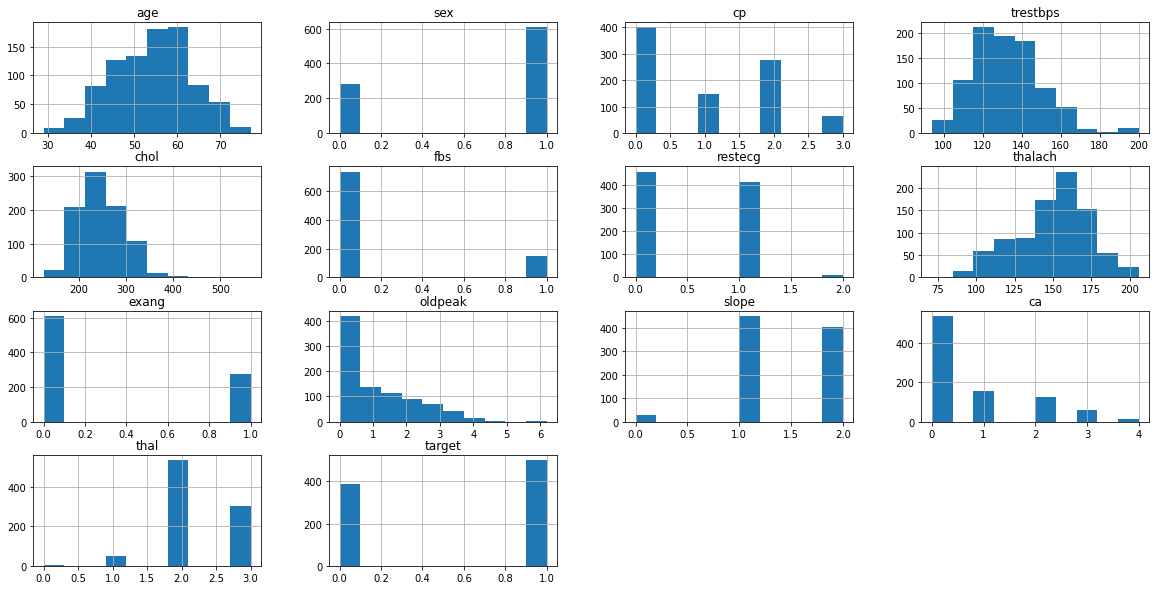

In [23]:
df.hist(figsize=(20, 10), bins = 10)
#Plotting histogram to check if there is any feature is of abnormal distribution.

<AxesSubplot:>

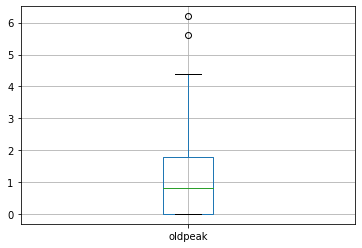

In [25]:
df.boxplot('oldpeak')
#Only two outliers - it is not a big deal for me. I think I will just leave everything as it is.

In [6]:
from sklearn.model_selection import train_test_split
columns = df.columns.tolist()                            # Get column names.
columns.remove('target')                                 # Remove 'target' (label y column)  
feature_data = df[columns]                               # Assign a variable to features x, including all columns except 'target'
target_data = df['target']                               # Assign 'target' to label y
trainX, testX, trainY,testY = train_test_split(feature_data, target_data, train_size=0.70, random_state=2603)

In [7]:
print('Training:' + str(trainX.shape))     # Count data samples in Training set.
print('Test:' + str(testX.shape))          # Count data samples in Test set.
print(trainY.shape)
print(testY.shape)

Training:(620, 13)
Test:(266, 13)
(620,)
(266,)


In [14]:
from sklearn.preprocessing import StandardScaler
#I only standardize numerical features - the categorical features (although have been converted to numerical values, should not be standardized).
cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca']
stdz = StandardScaler()

trainX[cols] = stdz.fit_transform(trainX[cols])
testX[cols] = stdz.transform(testX[cols])

In [27]:
trainX.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 620 entries, 633 to 285
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       620 non-null    float64
 1   sex       620 non-null    float64
 2   cp        620 non-null    float64
 3   trestbps  620 non-null    float64
 4   chol      620 non-null    float64
 5   fbs       620 non-null    float64
 6   restecg   620 non-null    float64
 7   thalach   620 non-null    float64
 8   exang     620 non-null    float64
 9   oldpeak   620 non-null    float64
 10  slope     620 non-null    float64
 11  ca        620 non-null    float64
 12  thal      620 non-null    float64
dtypes: float64(13)
memory usage: 67.8 KB


In [28]:
trainY.info()

<class 'pandas.core.series.Series'>
Int64Index: 620 entries, 633 to 285
Series name: target
Non-Null Count  Dtype
--------------  -----
620 non-null    int64
dtypes: int64(1)
memory usage: 9.7 KB


In [19]:
testX.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 266 entries, 26 to 404
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       266 non-null    float64
 1   sex       266 non-null    float64
 2   cp        266 non-null    float64
 3   trestbps  266 non-null    float64
 4   chol      266 non-null    float64
 5   fbs       266 non-null    float64
 6   restecg   266 non-null    float64
 7   thalach   266 non-null    float64
 8   exang     266 non-null    float64
 9   oldpeak   266 non-null    float64
 10  slope     266 non-null    float64
 11  ca        266 non-null    float64
 12  thal      266 non-null    float64
dtypes: float64(13)
memory usage: 29.1 KB


In [26]:
testY.info()
#I view the structure of the four sets trainX, trainY, testX, testY to see if they receive the same number of values and if the values are distributed according to the ration 7:3.

<class 'pandas.core.series.Series'>
Int64Index: 266 entries, 26 to 404
Series name: target
Non-Null Count  Dtype
--------------  -----
266 non-null    int64
dtypes: int64(1)
memory usage: 4.2 KB


In [15]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()                      # Initialize Logistic Regression model
logmodel.fit(trainX, trainY)                         # Train the model


LogisticRegression()

In [16]:
logmodel.score(trainX, trainY) 

0.9629032258064516

In [17]:
# Calculate prediction labels
predictions = logmodel.predict(testX)                        # Predict labels for X_test_scaler
final_prediction = pd.DataFrame({'target':predictions})      # Import labels to a dataframe 
print(final_prediction)

     target
0         1
1         0
2         1
3         0
4         1
..      ...
261       1
262       0
263       1
264       0
265       0

[266 rows x 1 columns]


In [18]:
# Evaluation metrics calculation
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, classification_report

print("Precision: ", precision_score(logmodel.predict(testX), testY))
print("Recall: ", recall_score(logmodel.predict(testX), testY))
print("F1: ", f1_score(logmodel.predict(testX), testY))
print("Confusion matrix: \n", confusion_matrix(logmodel.predict(testX), testY))
print("Classification report: \n", classification_report(logmodel.predict(testX), testY))

Precision:  0.9620253164556962
Recall:  0.9382716049382716
F1:  0.95
Confusion matrix: 
 [[ 98   6]
 [ 10 152]]
Classification report: 
               precision    recall  f1-score   support

           0       0.91      0.94      0.92       104
           1       0.96      0.94      0.95       162

    accuracy                           0.94       266
   macro avg       0.93      0.94      0.94       266
weighted avg       0.94      0.94      0.94       266

